In [1]:
%pylab inline
import vtspy

Populating the interactive namespace from numpy and matplotlib


### Step 1: Initialize config file

This will create an empty yaml file (config.yaml). Or, you can put an anasum root or DL3 fits file.

```python
vtspy.config.init("./XXXXX.anasum.root")
```
or 
```python
vtspy.config.init("./XXXXXanasum.fits")
```

In [22]:
ls ./veritas/

64080anasum.fits   bkg_obs64080.fits  pha_obs64080.fits  veritas_dataset.yaml
64081anasum.fits   bkg_obs64081.fits  pha_obs64081.fits
arf_obs64080.fits  hdu-index.fits.gz  rmf_obs64080.fits
arf_obs64081.fits  obs-index.fits.gz  rmf_obs64081.fits


In [2]:
vtspy.config.init("./veritas/*ana*")

In [3]:
vtspy.config.printConfig()

binning:
  binsperdec: 8
  binsz: 0.08
  coordsys: CEL
  projtype: WCS
  roiwidth: 12
data:
  evfile: ./fermi/SC00.fits
  ltcube: null
  scfile: ./fermi/SC00.fits
fileio:
  logfile: ./log/fermipy.log
  outdir: ./fermi/
  usescratch: false
gtlike:
  edisp: true
  edisp_disable:
  - isodiff
  - galdiff
  irfs: P8R3_SOURCE_V3
model:
  catalogs: /home/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
  galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
  isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
  src_roiwidth: 12
selection:
  dec: 22.01447088341406
  emax: 300000
  emin: 100
  evclass: 128
  evtype: 3
  glat: -5.784177918019131
  glon: 184.55760641646486
  ra: 83.63333155231746
  target: null
  tmax: 371865603.0
  tmin: 371779203.0
  zmax: 105



Now, it is ready to download LAT data.

### Step 2: Download Fermi-LAT data

In [9]:
dwn = vtspy.DownloadFermiData(verbose=2)

[Log] Query parameters:
                    coordfield = 83.63333155231746,22.01447088341406
                   coordsystem = J2000
                    shapefield = 15
                     timefield = 371779203.0,371865603.0
                      timetype = MET
                   energyfield = 100,300000
        photonOrExtendedOrNone = Extended
                   destination = query
                    spacecraft = checked

Answer from the LAT data server:

Your search criteria were:
Equatorial coordinates (degrees)
(83.6333,22.0145)
Time range (MET)
(371779203,371865603)
Time range (Gregorian)
(2012-10-13 00:00:00,2012-10-14 00:00:00)
Energy range (MeV)
(100,300000)
Search radius (degrees)
15
The estimated time for your query to complete is 311 seconds. The results of your query may be found at <https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L210417184219A885AEA883>.
[Log] Downloading...  https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L210417184219A885AEA883_

In [10]:
ls ./fermi

EV00.fits  EV01.fits  SC00.fits     gtselect.par
EV00.lst   EV02.fits  gtltcube.par


### Step 3: Analyze Fermi-LAT data by using fermipy

If you find any error in the following analyses, check your module version.

- fermipy v1.0.1
- ScienceTools v2.0.0
- 4FGL sources
- Environments, FERMIPY_DATA_DIR and FERMI_DIFFUSE_DIR, are required.


#### Step 3.1: Simple analysis

In [1]:
# You can use fermipy API as well.
%pylab inline
from vtspy import FermiAnalysis 

Populating the interactive namespace from numpy and matplotlib


In [2]:
gta = FermiAnalysis(verbosity=1, overwrite=True) # verbosity = 2 if you want to print out detailed logs.00,

2021-04-26 16:07:35 CRITICALFermiAnalysis.setup(): Running setup.


[Log] Initializing the Fermi-LAT analysis...
[Log] Overwriting the Fermi-LAT setup...


/root/miniconda3/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/root/miniconda3/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return 0.5 * (y[ys0] * x[xs0] + y[ys1] * x[xs1]) * log_ratio
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2021-04-26 16:20:21 CRITICALFermiAnalysis.setup(): Initializing source properties
2021-04-26 16:20:31 CRITICALFermiAnalysis.setup(): Finished setup.
2021-04-

Joint fit  ['galdiff', '4FGL J0534.5+2200', 'isodiff', '4FGL J0534.5+2201s']
Fitting shape galdiff TS:    298.572
Fitting shape 4FGL J0534.5+2200 TS:    283.037


2021-04-26 16:20:33 ERROR   FermiAnalysis.optimize(): Finished
2021-04-26 16:20:33 ERROR   FermiAnalysis.optimize(): LogLike: -5887.586156 Delta-LogLike: 163.970764
2021-04-26 16:20:33 ERROR   FermiAnalysis.optimize(): Execution time: 1.91 s


time -p gtpsf expcube=/home/Research/FermiAnalysis/Crab/./fermi//ltcube_00.fits outfile=/home/Research/FermiAnalysis/Crab/./fermi//gtpsf_00.fits outtable="PSF" irfs="P8R3_SOURCE_V3" evtype=3 ra=83.63333155231746 dec=22.01447088341406 emin=100.0 emax=300000.0 nenergies=20 thetamax=30.0 ntheta=300 chatter=2 clobber=yes debug=no gui=no mode="ql"
Using evtype=3 (i.e., FRONT/BACK irfs)
real 2.56
user 2.45
sys 0.78
[Log] Initial setup and configuration are saved [roi = initial].
[Log] Initialization of Fermi-LAT has been completed.


In [3]:
gta.printModel

2021-04-26 11:58:40 ERROR   FermiAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J0534.5+2200      0.003   3.289   0.00168   2.82    461.52       267.5     
4FGL J0534.5+2201s     0.005   1.755  6.75e-05   3.86      0.91        19.0     
4FGL J0534.5+2201i     0.006   0.000  6.62e-09   1.57     -0.00         0.0     
4FGL J0526.3+2246      2.037   1.375  2.13e-06   2.08       nan         0.2     
4FGL J0544.4+2238      2.375   1.565  3.84e-06   2.57       nan         0.7     
4FGL J0521.7+2112      3.071   0.896  0.000163   1.90     11.28         9.8     
4FGL J0536.2+1733      4.480   0.547  3.72e-06   2.09       nan         0.3     
4FGL J0539.0+1644      5.375   2.946  1.75e-06   1.39       nan         0.0     
4FGL J0550.9+2552      5.384   0.708  5.34e-06   2.60       nan         0.9     
4FGL J0534.2+2751      5.845   0.486  2.91e-06   1.

In [4]:
gta.setTarget("Crab")

[Log] A target is set to 4FGL J0534.5+2201s


In [5]:
gta.simpleAnalysis(min_ts=5)

In [6]:
gta.printModel

2021-04-26 11:59:22 ERROR   FermiAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J0534.5+2200      0.003   3.237   0.00175   2.89    442.12       293.6    *
4FGL J0534.5+2201s     0.005   0.001  2.48e-08   3.86     -0.00         0.0    *
4FGL J0534.5+2201i     0.006   0.000  5.85e-09   1.57     -0.00         0.0    *
4FGL J0526.3+2246      2.037   0.011  1.73e-08   2.08     -0.00         0.0    *
4FGL J0544.4+2238      2.375   0.000  2.62e-11   2.57     -0.00         0.0    *
4FGL J0521.7+2112      3.071   2.466  7.64e-05   5.26     17.38         6.9    *
4FGL J0536.2+1733      4.480   2.823  1.92e-05   2.09      0.06         1.6    *
4FGL J0539.0+1644      5.375   0.000  1.17e-10   1.39     -0.00         0.0    *
4FGL J0550.9+2552      5.384   0.000  9.44e-11   2.60     -0.00         0.0    *
4FGL J0534.2+2751      5.845   0.000  6.05e-11   1.

In [7]:
gta.makeOutput(jobs=["ts", "resid", "sed"]) 

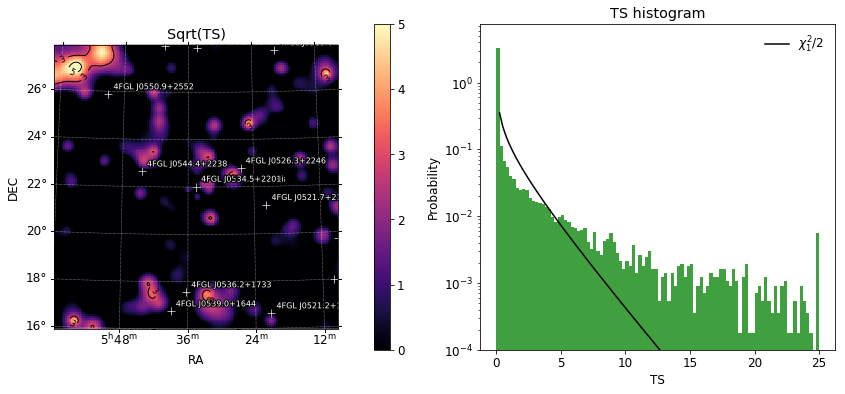

In [8]:
gta.plotTSMap(show=["sqrt_ts", "ts_hist"])  # sqrt_ts, ts_hist, and/or npred

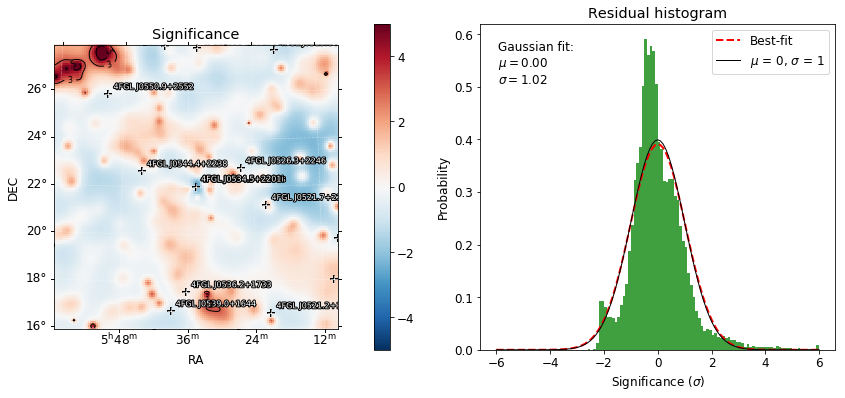

In [9]:
gta.plotResidMap(show=["sigma", "hist"])  # data, model, sigma, excess, and/or hist.

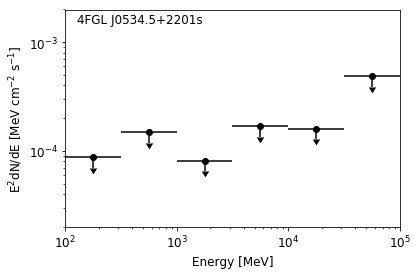

In [10]:
gta.plotSED()

In [11]:
gta.printModel

2021-04-26 12:07:35 ERROR   FermiAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J0534.5+2200      0.003   3.237   0.00175   2.89    442.12       293.6    *
4FGL J0534.5+2201s     0.005   0.001  2.48e-08   3.86     -0.00         0.0    *
4FGL J0534.5+2201i     0.006   0.000  5.85e-09   1.57     -0.00         0.0    *
4FGL J0526.3+2246      2.037   0.011  1.73e-08   2.08     -0.00         0.0    *
4FGL J0544.4+2238      2.375   0.000  2.62e-11   2.57     -0.00         0.0    *
4FGL J0521.7+2112      3.071   2.466  7.64e-05   5.26     17.38         6.9    *
4FGL J0536.2+1733      4.480   2.823  1.92e-05   2.09      0.06         1.6    *
4FGL J0539.0+1644      5.375   0.000  1.17e-10   1.39     -0.00         0.0    *
4FGL J0550.9+2552      5.384   0.000  9.44e-11   2.60     -0.00         0.0    *
4FGL J0534.2+2751      5.845   0.000  6.05e-11   1.

In [ ]:
print(gta.printTaget)

### Step 4. Analyzing Fermi data with Gammapy

- astropy v3.2.3
- gammapy v0.18.1
- iminuit v1.5.4
- fermipy v1.0.1
- ScienceTools v2.0.0
- 4FGL sources

In [1]:
%pylab inline
from vtspy import GammaAnalysis

Populating the interactive namespace from numpy and matplotlib


#### Step 4.1. you need to initialize the VERITAS and FERMI-LAT dataset.

In [2]:
ga = GammaAnalysis(verbosity=True, fermi=True, veritas=True)

[Log] Initializing gammapy...
[Log][0/6] Initializing the Fermi-LAT setup...
[Log][1/6] Loading fermipy setup...


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[Log][2/6] Loading the Fermi-LAT events...
[Log][3/6] Loading the Fermi-LAT IRFs...
[Log][4/6] Importing the list of sources from fermipy...
[Log][5/6] Importing the list of diffuse backgrounds from fermipy...
[Log][6/6] Completed.                             


No HDU found matching: OBS_ID = 64080, HDU_TYPE = bkg, HDU_CLASS = None
No HDU found matching: OBS_ID = 64081, HDU_TYPE = bkg, HDU_CLASS = None


[Log][0/6] Initializing the VERITAS setup...
[Log][1/6] Importing VERITAS DL3 files...
[Log][2/6] Defining the target and its ON region
[Log] A target is set to 4FGL J0534.5+2201s
[Log][3/6] Setting the exclusion region(s)...
[Log][4/6] Defining OFF regions and exporting on-off regions...
[Log][5/6] Defining spectral model for the target (Powerlaw with index = 2)...
[Log][6/6] Completed.                  
[Log] Initialization of gammapy has been completed.


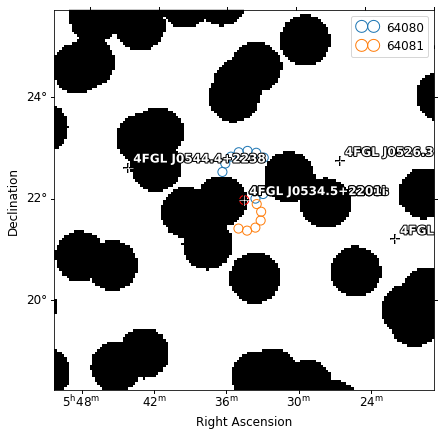

In [3]:
# Exclusion regions: Hipparcos_MAG8_1997.dat
ga.plotRoI()

#### Step 4.2. you need to set the target (default: target name in DL3 file, if exist)

In [3]:
ga.printAssociation

1 : 4FGL J0534.5+2200
	 ['4FGL J0534.5+2200', 'PSR J0534+2200', 'Crab IC field', 'J0534+2205', 'Crab pulsar']
2 : 4FGL J0534.5+2201s  *
	 ['4FGL J0534.5+2201s', 'Crab Nebula', 'J0534+2205', 'Crab']
3 : 4FGL J0534.5+2201i
	 ['4FGL J0534.5+2201i', 'Crab Nebula', 'J0534+2205', 'Crab']
4 : 4FGL J0526.3+2246
	 ['4FGL J0526.3+2246', 'NVSS J052622+224801']
5 : 4FGL J0544.4+2238
	 ['4FGL J0544.4+2238']
6 : 4FGL J0521.7+2112
	 ['4FGL J0521.7+2112', 'TXS 0518+211', 'VER J0521+211']
7 : 4FGL J0536.2+1733
	 ['4FGL J0536.2+1733', 'TXS 0533+175']
8 : 4FGL J0539.0+1644
	 ['4FGL J0539.0+1644', 'NVSS J053855+164612']
9 : 4FGL J0550.9+2552
	 ['4FGL J0550.9+2552', 'B2 0548+25A']
10 : 4FGL J0534.2+2751
	 ['4FGL J0534.2+2751', 'S 147 field']
11 : 4FGL J0540.3+2756e
	 ['4FGL J0540.3+2756e', 'Sim 147']
12 : 4FGL J0521.2+1637
	 ['4FGL J0521.2+1637', '3C 138']
13 : 4FGL J0509.1+1943
	 ['4FGL J0509.1+1943', 'TXS 0506+196']
14 : 4FGL J0519.6+2744
	 ['4FGL J0519.6+2744', '4C +27.15']
15 : 4FGL J0510.0+1800
	 ['4F

In [4]:
# Let's change the target. You can enter either id or a source name (e.g., ga.setTarget('Crab pulsar')
ga.setTarget(3)  

[Log] A target is set to 4FGL J0534.5+2201i


#### Step 4.3, Check models and their parameters.

In [5]:
ga.printParameter

4FGL J0534.5+2200  (tentative TS = 461.52; offset = 0.003 deg)
	 index      *	      1.878 +/-      0.000 	 [     0.000,      5.000]
	 amplitude  *	    3.3e-04 +/-    0.0e+00 	 [   1.0e-06,    1.0e+04]
	 reference  	      0.001 +/-      0.000 	 [     0.000,      0.001]
	 lambda_    *	    353.553 +/-      0.000 	 [    20.000,   2000.000]
	 alpha      *	      0.667 +/-      0.000 	 [     0.000,      2.000]
	 lon_0      	     83.637 +/-      0.000 	 [  -360.000,    360.000]
	 lat_0      	     22.015 +/-      0.000 	 [   -90.000,     90.000]
4FGL J0534.5+2201s  (tentative TS = 0.91; offset = 0.005 deg)
	 index      *	      3.865 +/-      0.000 	 [     0.000,      5.000]
	 amplitude  *	    1.8e-01 +/-    0.0e+00 	 [   1.0e-05,    1.0e+05]
	 reference  	      0.000 +/-      0.000 	 [     0.000,      0.000]
	 lon_0      	     83.633 +/-      0.000 	 [  -360.000,    360.000]
	 lat_0      	     22.020 +/-      0.000 	 [   -90.000,     90.000]
4FGL J0534.5+2201i * (tentative TS = -0.00; offset = 

In [7]:
ga.freeSources(min_ts=5)

#### Step 4.4. Set datasets

In [9]:
ga.setDatasets(fermi=True, veritas=True)

In [10]:
ga.printDatasets

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT
  Instrument : 
  Models     : ['4FGL J0534.5+2200', '4FGL J0534.5+2201s', '4FGL J0534.5+2201i', '4FGL J0521.7+2112', 'galdiff', 'isodiff']

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : VERITAS
  Instrument : 
  Models     : ['4FGL J0534.5+2200', '4FGL J0534.5+2201s', '4FGL J0534.5+2201i']




In [11]:
# Update a model for VERITAS
# 4FGL J0534.5+2201i is a proper model for VERITAS (others may not be extended up to TeV.)
ga.setModels("VERITAS", "4FGL J0534.5+2201i")

In [12]:
ga.printDatasets

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT
  Instrument : 
  Models     : ['4FGL J0534.5+2200', '4FGL J0534.5+2201s', '4FGL J0534.5+2201i', '4FGL J0521.7+2112', 'galdiff', 'isodiff']

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : VERITAS
  Instrument : 
  Models     : ['4FGL J0534.5+2201i']




#### Step 4.5. Perform a spectral analysis.

In [13]:
ga.spectralAnalysis(optimizer = "newminuit")

OptimizeResult

	backend    : minuit
	method     : minuit
	success    : False
	message    : Optimization failed. Call limit was reached.
	nfev       : 2143
	total stat : 9197.11



In [14]:
ga.printParameter

4FGL J0534.5+2200  (tentative TS = 461.52; offset = 0.003 deg)
	 index      *	      1.514 +/-      0.200 	 [     0.000,      5.000]
	 amplitude  *	    8.2e-04 +/-    5.0e-04 	 [   1.0e-09,    1.0e+01]
	 reference  	      0.001 +/-      0.000 	 [     0.000,      0.001]
	 lambda_    *	   1806.823 +/-   1119.614 	 [    20.000,   2000.000]
	 alpha      *	      0.578 +/-      0.155 	 [     0.000,      2.000]
	 lon_0      	     83.637 +/-      0.000 	 [  -360.000,    360.000]
	 lat_0      	     22.015 +/-      0.000 	 [   -90.000,     90.000]
4FGL J0534.5+2201s  (tentative TS = 0.91; offset = 0.005 deg)
	 index      	      3.865 +/-      0.000 	 [     0.000,      5.000]
	 amplitude  *	    1.0e-05 +/-    1.0e-05 	 [   1.0e-05,    1.0e+05]
	 reference  	      0.000 +/-      0.000 	 [     0.000,      0.000]
	 lon_0      	     83.633 +/-      0.000 	 [  -360.000,    360.000]
	 lat_0      	     22.020 +/-      0.000 	 [   -90.000,     90.000]
4FGL J0534.5+2201i * (tentative TS = -0.00; offset = 0

#### Step 4.6. Plot a spectral energy distribution (SED).

In [14]:
ga.calculateSED()

[Log] Initializing the flux calculation.
[Log][Fermi-LAT][4FGL J0534.5+2200] Completed.    
[Log][Fermi-LAT][4FGL J0534.5+2201s] Completed.    
[Log][Fermi-LAT][4FGL J0534.5+2201i] Completed.    
[Log][VERITAS][4FGL J0534.5+2201i] Completed.          


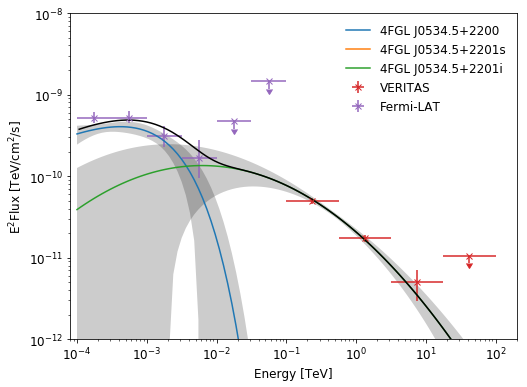

In [15]:
ga.plotSED()

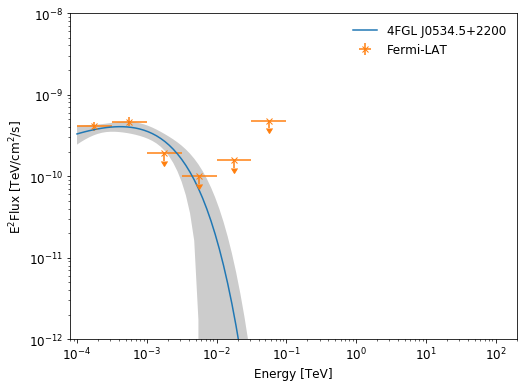

In [16]:
ga.plotSED("4FGL J0534.5+2200")

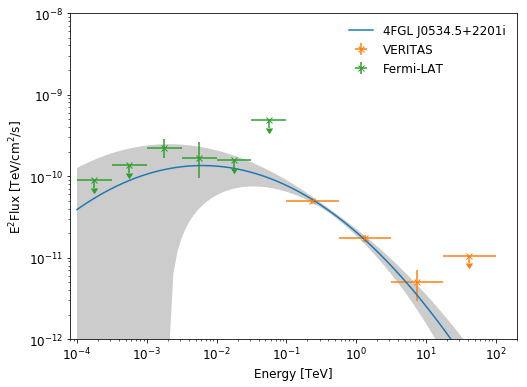

In [17]:
ga.plotSED("4FGL J0534.5+2201i")

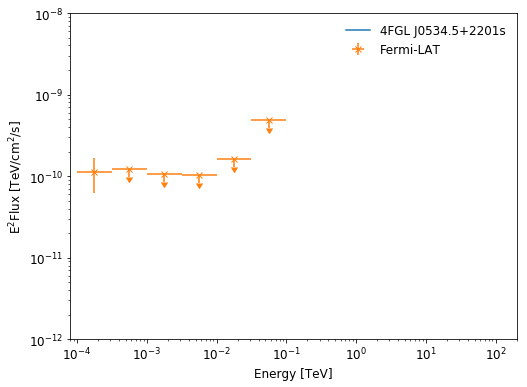

In [18]:
ga.plotSED("4FGL J0534.5+2201s")

In [25]:
a = ga.like[20]

In [23]:
ga.models['galdiff']

SkyModel(spatial_model=<gammapy.modeling.models.spatial.TemplateSpatialModel object at 0x7f22e1fed3d0>, spectral_model=<gammapy.modeling.models.spectral.PowerLawSpectralModel object at 0x7f22e1f80dd0>)temporal_model=None)

In [21]:
ga.models.names

['4FGL J0534.5+2200',
 '4FGL J0534.5+2201s',
 '4FGL J0534.5+2201i',
 '4FGL J0521.7+2112',
 'galdiff',
 'isodiff']